# Module Efficiency History and Projections

In [1]:
import numpy as np
import pandas as pd
import os,sys
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})
plt.rcParams['figure.figsize'] = (12, 8)

This journal covers the development of a historical baseline and baseline future projection of average module efficiency for each installation year.

In [2]:
cwd = os.getcwd() #grabs current working directory
skipcols = ['Source']
mod_eff_raw = pd.read_csv(cwd+"/../../../PV_ICE/baselines/SupportingMaterial/module_eff.csv", 
                          index_col='Year', usecols=lambda x: x not in skipcols)
mod_eff_raw['mod_eff'] = pd.to_numeric(mod_eff_raw['mod_eff'])

19.2


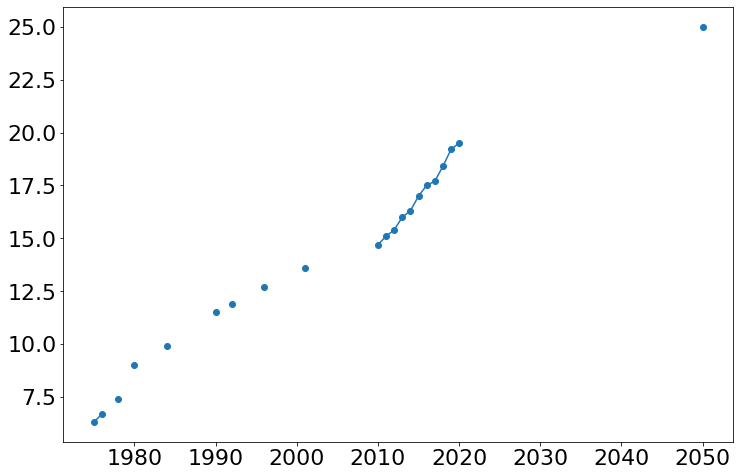

In [13]:
print(mod_eff_raw['mod_eff'][2019])
plt.plot(mod_eff_raw, marker='o')

There appears to be an "outlier" in 2003. This is from a different source. It does however, fit within the range of module efficiency specified in the prior data point (2001, avg = 13.6, min = 12, max = 16.1). For the purposes of interpolation, we will drop this single datapoint.

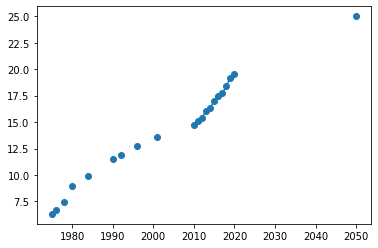

In [4]:
mod_eff_raw['mod_eff'][2003]=np.nan
plt.plot(mod_eff_raw, marker='o')

Now interpolate for missing years. Going to break into 2 parts for this, a linear historical part, and an exponential decay out to 2050.

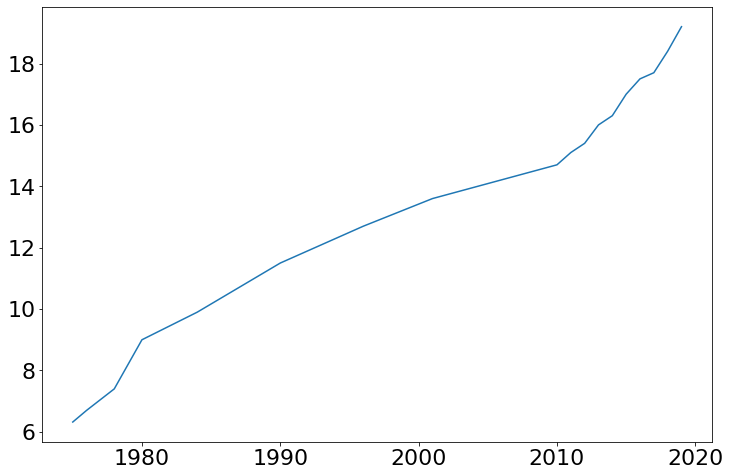

In [16]:
mod_eff_early = mod_eff_raw.loc[(mod_eff_raw.index<=2019)]
mod_eff_history = mod_eff_early.interpolate(method='linear',axis=0)
#print(mod_eff_history)
plt.plot(mod_eff_history)

In [6]:
# Import curve fitting package from scipy
from scipy.optimize import curve_fit
# Function to calculate the power-law with constants a and b
def power_law(x, a, b):
    return a*np.power(x, b)


25.05555430003681


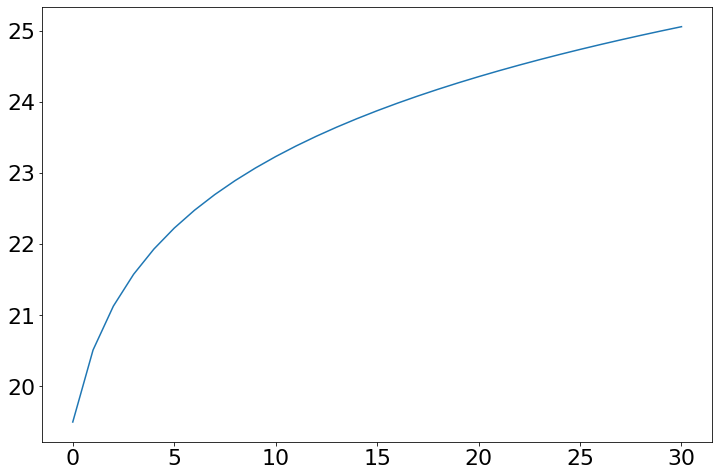

In [29]:
#generae a dataset for the area in between
mod_eff_late = mod_eff_raw.loc[(mod_eff_raw.index>=2020)]
y_dummy = power_law(mod_eff_late.index-2019, mod_eff_late['mod_eff'][2020], 0.073) 
#played around with the exponential until y_dummy[31] closely matched projected 25.06% value. CITE
print(y_dummy[30])
plt.plot(y_dummy)

C:\Users\hmirletz\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


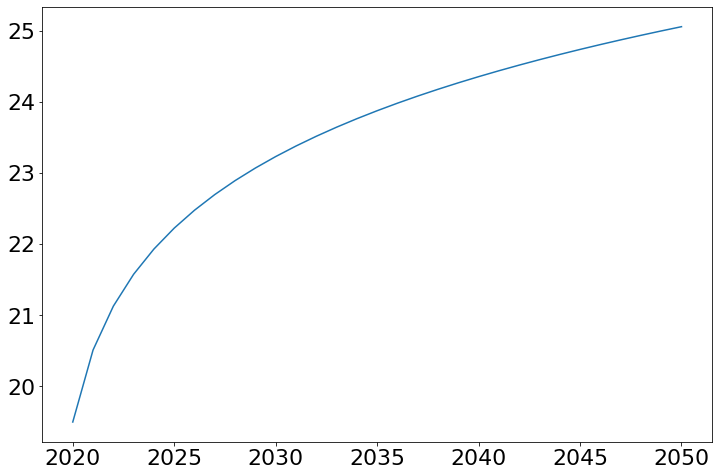

In [30]:
#create a dataframe of the projection
mod_eff_late['mod_eff'] = y_dummy
#print(mod_eff_late)
plt.plot(mod_eff_late)

Now smash the two dataframes back together for our average module efficiency baseline.

Text(0, 0.5, 'Efficiency (%)')

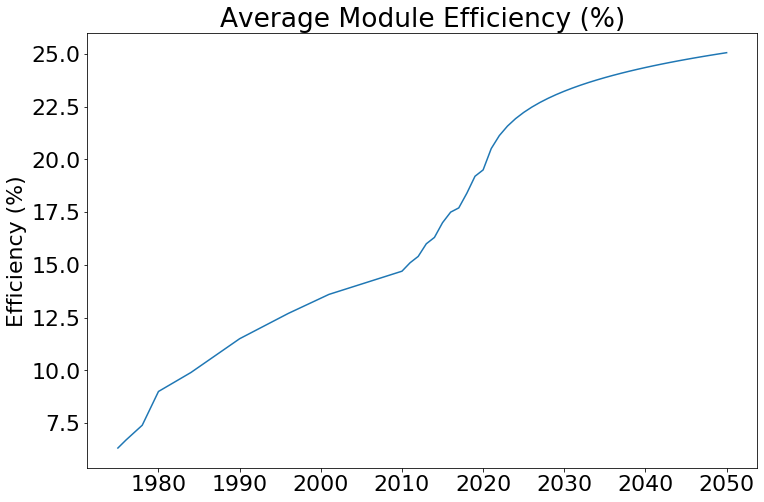

In [31]:
mod_eff = pd.concat([mod_eff_history, mod_eff_late])
mod_eff.to_csv(cwd+'/../../../PV_ICE/baselines/SupportingMaterial/output_avg_module_eff_final.csv', index=True)
plt.plot(mod_eff)
plt.title('Average Module Efficiency (%)')
plt.ylabel('Efficiency (%)')

(1974, 2050.5)

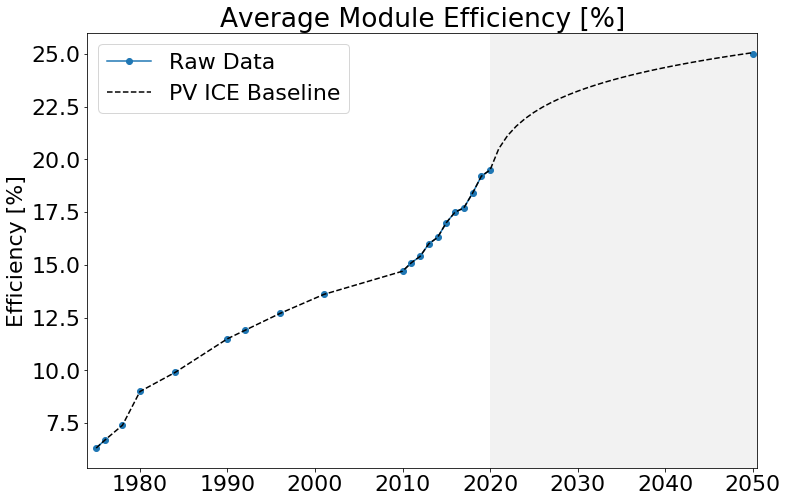

In [32]:
#graph for paper
plt.rcParams.update({'font.size': 22})
plt.rcParams['figure.figsize'] = (12, 8)

plt.axvspan(2020, 2050.5, facecolor='gray', alpha=0.1)
plt.plot(mod_eff_raw, marker='o', label='Raw Data')
plt.plot(mod_eff, '--k', label='PV ICE Baseline')
plt.title('Average Module Efficiency [%]')
plt.ylabel('Efficiency [%]')
plt.legend()
plt.xlim([1974, 2050.5])